---
# Lead Dell Fortaleza - Curso de Machine Learning 📊
### Oficina 2 - K-means Clustering

Neste notebook iremos realizar a análise do conjunto de dados "Mall Customers" da Lead Dell. Será implementado um modelo de k-means para agrupar os clientes, usando como atributos a idade e seu respectivo <i>score</i>.


Por: Pedro Florencio de Almeida Neto

---

<b>Explicação do modelo:</b>

A clusterização é o processo de separar dados e agrupá-los em clusters usando como base na semelhança entre eles. É um modelo de aprendizado não-supervisionado, uma vez que a priori não há rótulo nos dados. Há várias formas de calcular a distância entre dados, entre elas temos:

<b>Cálculo da distância dos dados:</b>

* Distância Manhattan:

                                                         |x1 - x2| + |y1 - y2|

* Distância Euclidiana
$$
\sqrt[]{(x1-x2)²+(y1-y2)²}	
$$

Para realizar a divisão dos dados, há duas abordagens gerais:

* <b>Algoritmos hieráquicos</b>

    Árvores binárias
    
    Dendograma

Podem ainda ser divididos em:

    Aglomerativos
    
    Divisivos

* <b>Algoritmos não-hieráquicos</b>

K-means

<b> Algoritmo K-means </b>
1. Dividir os dados em K grupos com centróides criadas aleatoriamente;
2. Repetir até que a condição de parada seja satisfeita:
    - Calcular a distância de cada dado ao centróide;
    - Atribuir o dado ao grupo com menor distância ao centróide;
    - Atualizar todos os centróides.

Funcionamento:

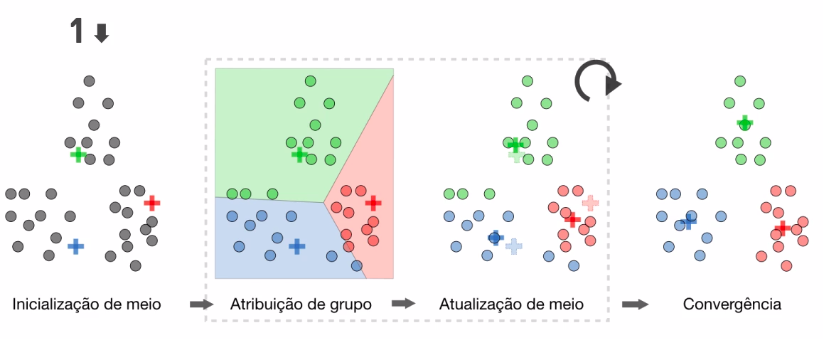

Fonte: Lead Fortaleza

<b> Como definir o valor de K? </b>

Através do método <b>Elbow</b> que plota a variância dos dados em função do número de clusters.

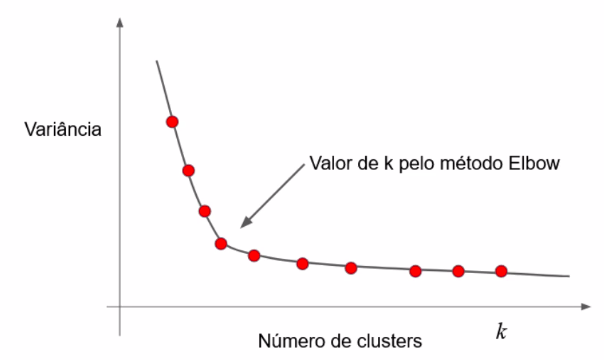

Fonte: Lead Fortaleza

Escolhe-se o valor no qual a medida que k cresce, a partir deste valor atual, o valor de variância não se modifica significativamente.

---
<b> Importando as bibliotecas necessárias </b>

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

<b> Importando o dataset </b>

In [83]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [84]:
df.shape # Há 200 clientes e 5 atributos: Id do cliente, gênero, idade, renda anual e score

(200, 5)

<b> Verificando a presença de dados nulos </b>

In [85]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<b> Verificando as estatísticas do conjunto de dados </b>

In [86]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<b> Gráfico Idade x Score do cliente <b/>

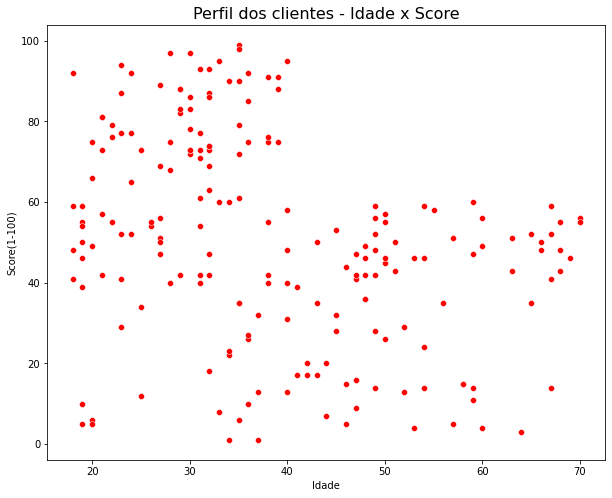

In [87]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=df,color='red')
plt.xlabel('Idade')
plt.ylabel('Score(1-100)')
plt.title('Perfil dos clientes - Idade x Score',fontdict={'fontsize':16})
plt.show()

<b> Selecionando dados para agrupamento </b>

In [88]:
# Idade e score são os atributos selecionados
X = df[['Age','Spending Score (1-100)']] 
X

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


<b> Usando K-means e clusterizando com K = 5</b>

In [89]:
# Criando o modelo usando scikit learn
modelo = KMeans(n_clusters = 5, init='k-means++')

In [90]:
# Realizando as rotulações com base no modelo treinado
y = modelo.fit_predict(X)

In [91]:
y

array([2, 0, 4, 0, 2, 0, 4, 0, 3, 0, 3, 0, 3, 0, 4, 0, 2, 2, 3, 0, 2, 0,
       3, 0, 3, 0, 3, 2, 4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4, 0, 1, 0, 1, 2,
       3, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 0, 4, 0, 1, 0, 3, 0, 3, 0,
       2, 0, 4, 0, 3, 0, 4, 0, 3, 0, 2, 0, 4, 0, 1, 0, 4, 0, 3, 0, 3, 0,
       3, 0, 4, 0, 4, 0, 1, 0, 4, 0, 3, 0, 3, 0, 4, 2, 4, 0, 4, 0, 3, 0,
       3, 0, 3, 0, 4, 0, 3, 0, 2, 0, 3, 0, 4, 0, 4, 0, 4, 0, 3, 0, 3, 0,
       4, 0], dtype=int32)

In [92]:
# Adicionando uma nova coluna ao dataframe que remete ao grupo que o cliente pertence, para realizar a visualização dos dados
df['Group'] = y

In [93]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2


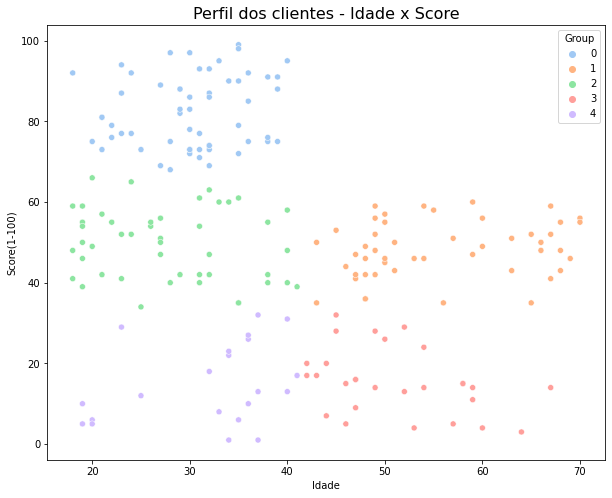

In [94]:
# Visualização do gráfico de dispersão com base na separação dos clusters
fig = plt.figure(figsize=(10,8))
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=df,hue='Group',palette = 'pastel')
plt.xlabel('Idade')
plt.ylabel('Score(1-100)')
plt.title('Perfil dos clientes - Idade x Score',fontdict={'fontsize':16})
plt.show()

O modelo trabalhou de forma a determinar 5 clusters sempre objetivando uma menor variância dos dados quanto à centróide de cada cluster no qual eles pertencem. Podemos observar que o grupo vermelho poderia ser rotulado como os clientes que tem os scores mais altos. Esse agrupamento é importante para definir, por exemplo, a possibilidade de aumento ou concessão de crédito a um determinado cliente.

<b>Obrigado!</b>

---